/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


{'optimization_level': 3, 'resilience_level': None, 'max_execution_time': None, 'execution': {'init_qubits': True, 'rep_delay': None}, 'resilience': {'measure_mitigation': None, 'measure_noise_learning': {'num_randomizations': None, 'shots_per_randomization': None}, 'zne_mitigation': False, 'zne': {'noise_factors': None, 'extrapolator': None}, 'pec_mitigation': False, 'pec': {'max_overhead': None, 'noise_gain': None}, 'layer_noise_learning': {'max_layers_to_learn': None, 'shots_per_randomization': None, 'num_randomizations': None, 'layer_pair_depths': None}}, 'environment': {'log_level': 'WARNING', 'job_tags': None}, 'simulator': {'seed_simulator': 100, 'coupling_map': None, 'basis_gates': None}}
Circuit context


/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/q_env_config.py:105: UserWarning: No backend was provided, State vector simulation will be used
  warnings.warn("No backend was provided, State vector simulation will be used")


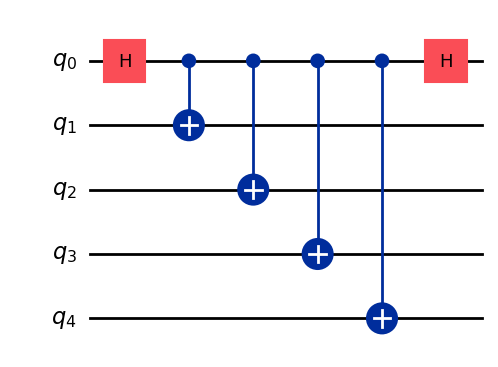

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from template_configurations.qiskit.gate_level import (
    q_env_config as gate_q_env_config,
    circuit_context,
)
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from gymnasium.wrappers import RescaleAction, ClipAction

circuit_context.draw("mpl")

In [2]:
from qiskit.visualization import plot_gate_map, plot_circuit_layout

if (
        gate_q_env_config.backend_config.backend is not None
        and circuit_context.layout is not None
):
    plot_circuit_layout(
        circuit_context, gate_q_env_config.backend_config.backend, view="physical"
    )

In [3]:
# gate_q_env_config.target["register"] = [8, 11]

In [4]:
use_context = False
if use_context:
    q_env = ContextAwareQuantumEnvironment(
        gate_q_env_config, circuit_context, training_steps_per_gate=250
    )
else:
    q_env = QuantumEnvironment(gate_q_env_config)
rescaled_env = RescaleAction(ClipAction(q_env), -1.0, 1.0)

/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/helper_functions.py:1699: UserWarning: No Backend was provided, using default values for dt, coupling_map, basis_gates and instruction_durations
  warnings.warn(


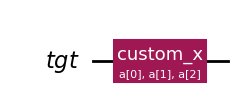

In [5]:
q_env.circuit_truncations[0].draw("mpl", style="iqp")

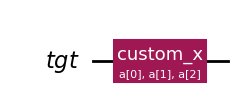

In [6]:
from qiskit import transpile

circuit = transpile(q_env.circuit_truncations[0], q_env.backend, optimization_level=1)
circuit.draw("mpl")

In [7]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

q_env.backend.simulator

True

In [7]:
if use_context:
    q_env.circuit_context.draw("mpl")

In [8]:
from qiskit.visualization import plot_gate_map

if q_env.backend is not None and q_env.backend_info.coupling_map.size() != 0:
    plot_gate_map(q_env.backend)

In [9]:
import yaml

with open(
        "/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/agent_config.yaml",
        "r",
) as f:
    agent_config = yaml.safe_load(f)

In [10]:
from ppo import CustomPPO

ppo_agent = CustomPPO(agent_config, rescaled_env)

In [11]:
print(q_env.backend.target)

AttributeError: 'NoneType' object has no attribute 'target'

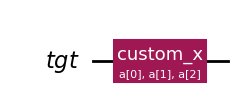

In [12]:
from qiskit import transpile

transpile(q_env.circuit_truncations[0], q_env.backend, optimization_level=1).draw("mpl")

In [13]:
q_env.estimator.session.status()

AttributeError: 'StatevectorEstimator' object has no attribute 'session'

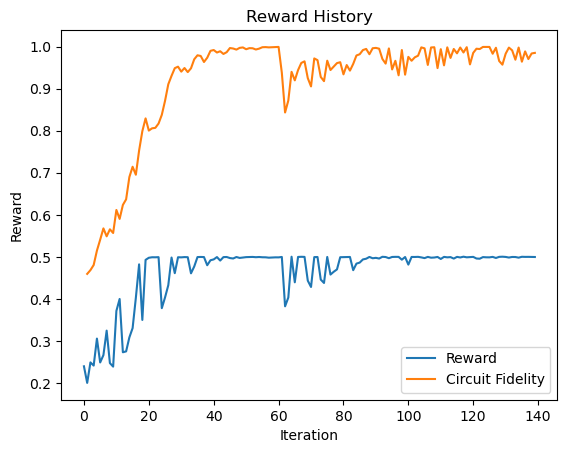

  8%|▊         | 39/500 [00:15<03:30,  2.19it/s]

Average fidelity of last gate: 0.9849440131077786
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9988606827970768
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'Y'],
              coeffs=[ 0.25+0.j, -0.25+0.j])


  8%|▊         | 40/500 [00:15<03:11,  2.40it/s]

Finished Estimator job
Time taken 0.2520923614501953
Average fidelity of last gate: 0.9988606827970768
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9838840730376817
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'Z'],
              coeffs=[0.25+0.j, 0.25+0.j])


  8%|▊         | 41/500 [00:15<02:56,  2.60it/s]

Finished Estimator job
Time taken 0.24211788177490234
Average fidelity of last gate: 0.9838840730376817
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9862000594505642
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'Z'],
              coeffs=[0.25+0.j, 0.25+0.j])


  8%|▊         | 42/500 [00:16<02:45,  2.76it/s]

Finished Estimator job
Time taken 0.23755288124084473
Average fidelity of last gate: 0.9862000594505642
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.998928496400976
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'Y'],
              coeffs=[ 0.25+0.j, -0.25+0.j])


  9%|▊         | 43/500 [00:16<02:38,  2.89it/s]

Finished Estimator job
Time taken 0.2404789924621582
Average fidelity of last gate: 0.998928496400976
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9881270607037569
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'Z'],
              coeffs=[0.25+0.j, 0.25+0.j])


  9%|▉         | 44/500 [00:16<02:32,  2.99it/s]

Finished Estimator job
Time taken 0.23896384239196777
Average fidelity of last gate: 0.9881270607037569
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9968308199504781
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'Y'],
              coeffs=[ 0.25+0.j, -0.25+0.j])


  9%|▉         | 45/500 [00:17<02:29,  3.04it/s]

Finished Estimator job
Time taken 0.2412738800048828
Average fidelity of last gate: 0.9968308199504781
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9735521841220293
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'Z'],
              coeffs=[ 0.25+0.j, -0.25+0.j])


  9%|▉         | 46/500 [00:17<02:25,  3.13it/s]

Finished Estimator job
Time taken 0.22640490531921387
Average fidelity of last gate: 0.9735521841220293
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9978511948105042
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'X'],
              coeffs=[0.25+0.j, 0.25+0.j])


  9%|▉         | 47/500 [00:17<02:24,  3.13it/s]

Finished Estimator job
Time taken 0.24114203453063965
Average fidelity of last gate: 0.9978511948105042
Starting benchmarking...


 10%|▉         | 48/500 [00:18<03:22,  2.23it/s]

Starting simulation benchmark...
Avg gate fidelity: 0.9980479231088107
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
{}
SparsePauliOp(['I', 'Y'],
              coeffs=[ 0.25+0.j, -0.25+0.j])
Finished Estimator job
Time taken 0.6753199100494385
Average fidelity of last gate: 0.9980479231088107


 10%|▉         | 48/500 [00:18<02:53,  2.60it/s]


Starting benchmarking...


KeyboardInterrupt: 

In [15]:
ppo_agent.train(
    total_updates=500, print_debug=False, num_prints=10, clear_history=False
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

reward_history = np.array(q_env.reward_history)
mean_rewards = np.mean(reward_history, axis=-1)
max_mean = int(np.max(mean_rewards) * 1e4) / 1e4

plt.plot(mean_rewards, label=f"Mean Batch Rewards, max: {max_mean}")
if isinstance(q_env, ContextAwareQuantumEnvironment):
    plt.plot(q_env.circuit_fidelity_history, label="Fidelity")
else:
    plt.plot(q_env.avg_fidelity_history, label="Fidelity")
plt.xlabel("Updates")
plt.ylabel("Reward")
plt.title(f"{q_env.target['gate'].name.upper()} Learning Curve")
plt.legend()
plt.show()

In [ ]:
q_env.reward_history[49]

In [ ]:
q_env.optimal_action

In [ ]:
q_env.target["input_states"][0][3]["target_state"]["circuit"].draw("mpl")

In [ ]:
from qiskit.quantum_info import average_gate_fidelity
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import CXGate
from qiskit.circuit import ParameterVector

qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
theta = ParameterVector("θ", 7)
q_env.parametrized_circuit_func(qc, theta, qr, target={"gate": CXGate()})
qc.draw("mpl")

In [ ]:
qc.assign_parameters(q_env.optimal_action, inplace=True)
qc.draw("mpl")

In [ ]:
from qiskit.quantum_info import Operator

average_gate_fidelity(Operator(qc), q_env.target["gate"])